In [1]:
import numpy as np
import matplotlib.pyplot as plt
from utils import plot_points, plot_decision_boundary

**Task 1**

In [2]:
X_NAND = np.array([[0,0], [1,0], [0,1], [1,1]])
Y_NAND = np.array([1, 1, 1, 0])

X_NOR = np.array([[0, 0], [0, 1], [1,0], [1, 1]])
Y_NOR = np.array([1, 0, 0, 0])

**Task 2**

In [3]:
X_XOR = np.array([[0, 0], [0, 1], [1,0], [1, 1]])
Y_XOR = np.array([0, 1, 1, 0])

X_XNOR = np.array([[0, 0], [0, 1], [1,0], [1, 1]])
Y_XNOR = np.array([1, 0, 0, 1])

**Task 3**

In [4]:
def preprocess(x : np.ndarray, y : np.ndarray):
    neg_ones = -1 * np.ones(4).reshape(-1, 1)
    k = np.hstack((neg_ones, x))
    for i in range(k.shape[0]):
        if (not(y[i])):
            k[i] = -1 * k[i]
    return k

**Task 4**

In [5]:
def perceptron(V : np.ndarray, n : int):
    W = np.array([0, 0, 0])
    done = False
    num = 1
    while not done:
        if ( num > 10000 ):
            break
        for i in range(n):
            V_curr = V[i]
            if ( np.dot(V_curr, W) <= 0 ):
                W = W + V_curr
                break
        else: done = True
        num = num + 1
    return W

**Task 5**

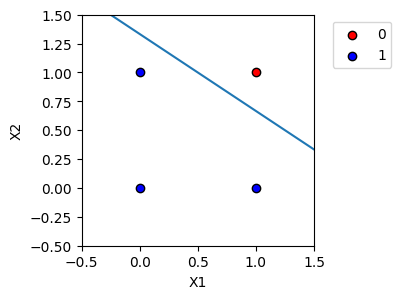

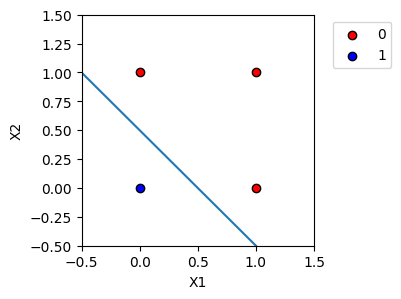

In [20]:
V_NAND = preprocess(X_NAND, Y_NAND)
V_NOR = preprocess(X_NOR, Y_NOR)

W_NAND = perceptron(V_NAND, 4)
W_NOR = perceptron(V_NOR, 4)

plot_decision_boundary(X_NAND, Y_NAND, W_NAND)
plot_decision_boundary(X_NOR, Y_NOR, W_NOR)

























































**Task 6**

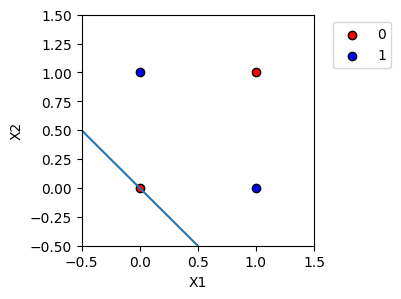

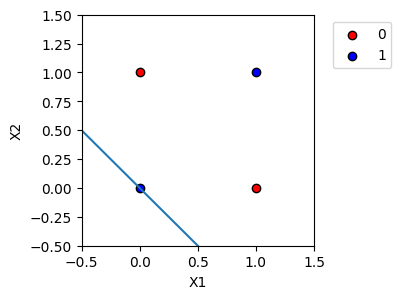

In [19]:
V_XOR = preprocess(X_XOR, Y_XOR)
V_XNOR = preprocess(X_XNOR, Y_XNOR)

W_XOR = perceptron(V_XOR, 4)
W_XNOR = perceptron(V_XNOR, 4)

plot_decision_boundary(X_XOR, Y_XOR, W_XOR)
plot_decision_boundary(X_XNOR, Y_XNOR, W_XNOR)

**Sigmoid Function**

In [8]:
def Sigmoid(value : int):
    Sigmoid_value = 1 / ( 1 + np.exp(-1 * value) )
    return Sigmoid_value

**Task 7**

In [14]:
def preprocess_gd(x : np.ndarray, y : np.ndarray):
    neg_ones = -1 * np.ones(4).reshape(-1, 1)
    k = np.hstack((neg_ones, x))
    return k

def sigmoid(x : float):
    return 1 / (1 + np.exp(-x))

def output(x : float):
    if (x > 0.9): 
        return 1
    elif (x < 0.1):
        return 0
    else: 
        return x

def mse(target: float, out: float):
    return target - out

def cross_entropy(target : float, out : float):
    return -(((1 - target)/ (1 - out + 0.0000001)) - (target / out + 0.0000001))
    
def gradient_descent_mse(y : np.ndarray, x: np.ndarray):

    W = np.random.normal(scale=1, size=3)
    LR = 0.01
    maxDelW = [1,1,1]
    count = 0

    num_iter = 10000
    while count < num_iter:
        maxDelW = 0
        count += 1
        avgDW = 0
        for i in range(4):
            target = y[i]
            out = sigmoid(np.dot(W, x[i]))
            delW = LR * (target - out) * out * (1 - out) * x[i]
            avgDW = avgDW + delW
        avgDW = avgDW / 4
        W = W + avgDW
            
    return W

def gradient_descent_cross(y : np.ndarray, x: np.ndarray):

    W = np.random.normal(scale=1, size=3)
    LR = 0.01
    maxDelW = [1,1,1]
    count = 0

    num_iter = 10000
    
    while count < num_iter:
        maxDelW = 0
        count += 1
        avgDW = 0
        for i in range(4):
            target = y[i]
            out = sigmoid(np.dot(W, x[i]))
            delW = LR * (((1 - target)/ (1 - out + 0.0000001)) - (target / out + 0.0000001)) * out * (1 - out) * x[i]

            avgDW = avgDW + delW
        avgDW = avgDW / 4
        W = W - avgDW
            
    return W


**Task 8**

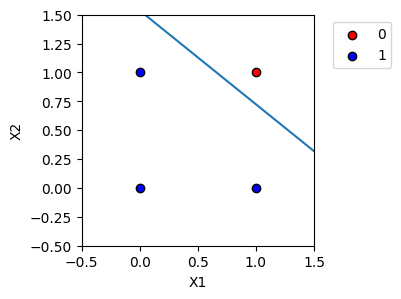

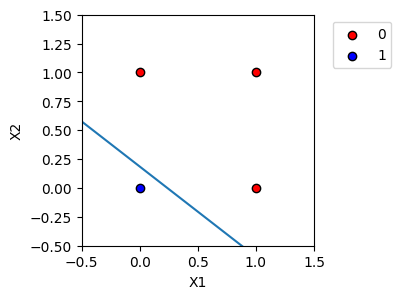

In [15]:
V_NAND = preprocess_gd(X_NAND, Y_NAND)
V_NOR = preprocess_gd(X_NOR, Y_NOR)

W_NAND = gradient_descent_mse(Y_NAND, V_NAND)
W_NOR = gradient_descent_mse(Y_NOR, V_NOR)

plot_decision_boundary(X_NAND, Y_NAND, W_NAND)
plot_decision_boundary(X_NOR, Y_NOR, W_NOR)



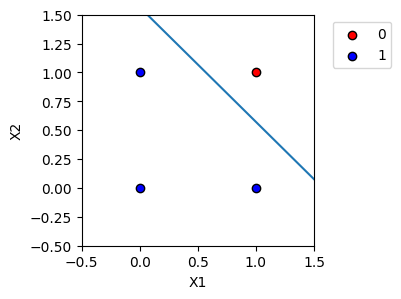

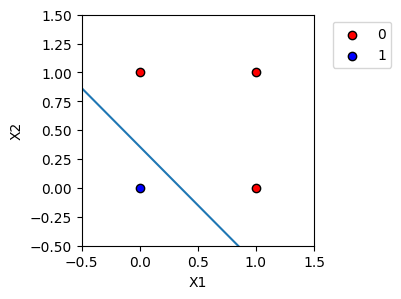

In [16]:
V_NAND = preprocess_gd(X_NAND, Y_NAND)
V_NOR = preprocess_gd(X_NOR, Y_NOR)

W_NAND = gradient_descent_cross(Y_NAND, V_NAND)
W_NOR = gradient_descent_cross(Y_NOR, V_NOR)

plot_decision_boundary(X_NAND, Y_NAND, W_NAND)
plot_decision_boundary(X_NOR, Y_NOR, W_NOR)

**Task 9**

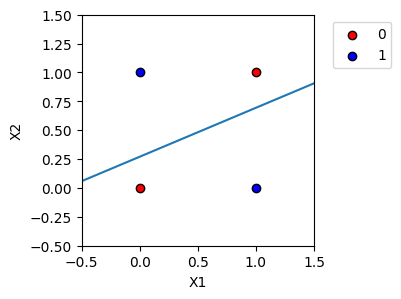

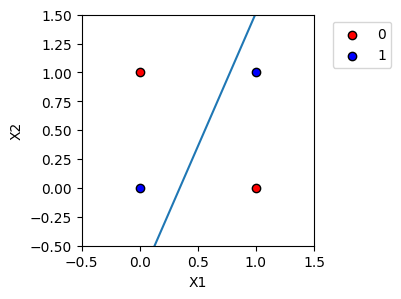

In [17]:
V_XOR = preprocess_gd(X_XOR, Y_XOR)
V_XNOR = preprocess_gd(X_XNOR, Y_XNOR)

W_XOR = gradient_descent_mse(Y_XOR, V_XOR)
W_XNOR = gradient_descent_mse(Y_XNOR, V_XNOR)

plot_decision_boundary(X_XOR, Y_XOR, W_XOR)
plot_decision_boundary(X_XNOR, Y_XNOR, W_XNOR)

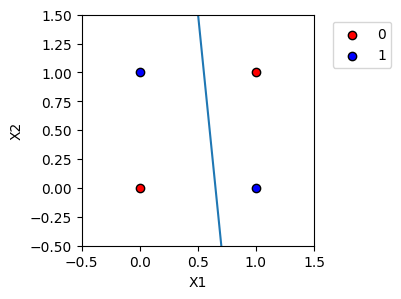

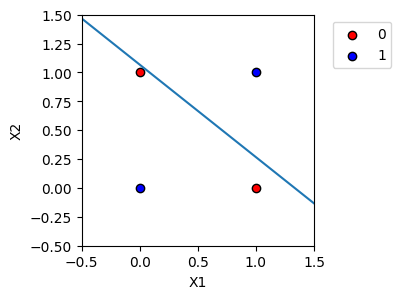

In [18]:
V_XOR = preprocess_gd(X_XOR, Y_XOR)
V_XNOR = preprocess_gd(X_XNOR, Y_XNOR)

W_XOR = gradient_descent_cross(Y_XOR, V_XOR)
W_XNOR = gradient_descent_cross(Y_XNOR, V_XNOR)

plot_decision_boundary(X_XOR, Y_XOR, W_XOR)
plot_decision_boundary(X_XNOR, Y_XNOR, W_XNOR)